In [1]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [39]:
import numpy as np
from numpy import NaN
import pandas as pd
import spacy 
%run Preprocessing.ipynb import PreTextCleaner
%run Analysis.ipynb import Aspect
# from Preprocessing import PreTextCleaner
from spacy import displacy

nlp = spacy.load("en_core_web_sm")

Note: you may need to restart the kernel to use updated packages.


In [40]:
# Run config file
%run config.ipynb
# Reading config file
import configparser
config = configparser.ConfigParser()
config.read("config.ini")

['config.ini']

In [41]:
l = []
import codecs
sentences = codecs.open(config['Data']['data'], "r", "utf-8")
for i in sentences:
    l.append(i)
# print(l)
    
z_test_sample=l
text = []
action = {'lower_case' : eval(config['Preprocessing']['lower_case']),
        'remove_numeric': eval(config['Preprocessing']['remove_numeric']),
        'numeric_to_word': eval(config['Preprocessing']['numeric_to_word']),
        'remove_sentence_split_delimeters': eval(config['Preprocessing']['remove_sentence_split_delimeters']),
        'remove_text_in_brackets': eval(config['Preprocessing']['remove_text_in_brackets']),
        'remove_links': eval(config['Preprocessing']['remove_links']),
        'negation_handling': eval(config['Preprocessing']['negation_handling']),
        'remove_puntuation': eval(config['Preprocessing']['remove_puntuation']),
        'remove_whitespace': eval(config['Preprocessing']['remove_whitespace']),
        'lemmatization' : eval(config['Preprocessing']['lemmatization'])}

text_cleaner = PreTextCleaner(action)
# print(text_cleaner)
for i in range(len(z_test_sample)):
    text.append(text_cleaner.clean(z_test_sample[i]))

In [42]:
print(text)

['wow loved this place', 'crust is not good', 'not tasty and the texture was just nasty', 'stopped by during the late may bank holiday off rick steve recommendation and loved it', 'the selection on the menu was great and so were the prices', 'now i am getting angry and i want my damn pho', 'honeslty it did not taste that fresh', 'the potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer', 'the fries were great too', 'a great touch', 'service was very prompt', 'would not go back', 'the cashier had no care what so ever on what i had to say it still ended up being wayyy overpriced', 'i tried the cape cod ravoli chicken with cranberrymmmm', 'i was disgusted because i was pretty sure that was human hair', 'i was shocked because no signs indicate cash only', 'highly recommended', 'waitress was a little slow in service', 'this place is not worth your time let alone vegas', 'did not like at all', 'the burrittos blah', 'the food amazing', 'se

In [43]:
p = []
n = []
import codecs
pos = codecs.open(config['Data']['positive_words'])
neg = codecs.open(config['Data']['negative_words'])
for i in pos:
    p.append(i)
for i in neg:
    n.append(i)

p_test_sample = p
n_test_sample = n
text1 = []
text2 = []
action = {'lower_case' : eval(config['PositiveNegative']['lower_case']),
        'remove_numeric': eval(config['PositiveNegative']['remove_numeric']),
        'numeric_to_word': eval(config['PositiveNegative']['numeric_to_word']),
        'remove_sentence_split_delimeters': eval(config['PositiveNegative']['remove_sentence_split_delimeters']),
        'remove_text_in_brackets': eval(config['PositiveNegative']['remove_text_in_brackets']),
        'remove_links': eval(config['PositiveNegative']['remove_links']),
        'negation_handling': eval(config['PositiveNegative']['negation_handling']),
        'remove_puntuation': eval(config['PositiveNegative']['remove_puntuation']),
        'remove_whitespace': eval(config['PositiveNegative']['remove_whitespace']),
        'lemmatization' : eval(config['PositiveNegative']['lemmatization'])}
text_cleaner_words = PreTextCleaner(action)
for i in range(len(p_test_sample)):
    text1.append(text_cleaner_words.clean(p_test_sample[i]))
for i in range(len(n_test_sample)):
    text2.append(text_cleaner_words.clean(n_test_sample[i]))

In [44]:
print(text1)

['a+', 'abound', 'abounds', 'abundance', 'abundant', 'accessable', 'accessible', 'acclaim', 'acclaimed', 'acclamation', 'accolade', 'accolades', 'accommodative', 'accomodative', 'accomplish', 'accomplished', 'accomplishment', 'accomplishments', 'accurate', 'accurately', 'achievable', 'achievement', 'achievements', 'achievible', 'acumen', 'adaptable', 'adaptive', 'adequate', 'adjustable', 'admirable', 'admirably', 'admiration', 'admire', 'admirer', 'admiring', 'admiringly', 'adorable', 'adore', 'adored', 'adorer', 'adoring', 'adoringly', 'adroit', 'adroitly', 'adulate', 'adulation', 'adulatory', 'advanced', 'advantage', 'advantageous', 'advantageously', 'advantages', 'adventuresome', 'adventurous', 'advocate', 'advocated', 'advocates', 'affability', 'affable', 'affably', 'affectation', 'affection', 'affectionate', 'affinity', 'affirm', 'affirmation', 'affirmative', 'affluence', 'affluent', 'afford', 'affordable', 'affordably', 'afordable', 'agile', 'agilely', 'agility', 'agreeable', 'ag

In [45]:
positive_words = []
negative_words = []
def check_words_infile():
    for i in text:
        i = i.split()
        for j in i:
            if j in text1:
                if j not in positive_words:
                    positive_words.append(j)
            elif j in text2:
                if j not in negative_words:
                    negative_words.append(j)
            
check_words_infile()

In [46]:
print(positive_words)

['wow', 'loved', 'good', 'recommendation', 'great', 'fresh', 'like', 'warmer', 'prompt', 'pretty', 'recommended', 'worth', 'amazing', 'cute', 'beautiful', 'friendly', 'warm', 'decent', 'happier', 'favor', 'redeeming', 'inexpensive', 'ample', 'delight', 'tender', 'enough', 'positive', 'attentive', 'right', 'refreshing', 'nice', 'enjoy', 'wonderful', 'imaginative', 'perfectly', 'delicious', 'glad', 'well', 'sweet', 'seasoned', 'love', 'sexy', 'hottest', 'best', 'fantastic', 'loves', 'helpful', 'better', 'honest', 'liked', 'fine', 'loving', 'liking', 'phenomenal', 'excellent', 'solid', 'top', 'clean', 'free', 'impressed', 'reasonably', 'terrific', 'thrilled', 'modern', 'healthy', 'incredible', 'interesting', 'hot', 'satisfied', 'exceeding', 'gold', 'rich', 'bargain', 'welcome', 'fun', 'gratitude', 'privileged', 'fast', 'tough', 'exquisite', 'generous', 'dedicated', 'outstanding', 'recommend', 'convenient', 'incredibly', 'charming', 'delightful', 'lighter', 'reasonable', 'happy', 'exceptio

In [51]:
#Number of seed words from user - 
aspect_dict = {}
seed_words_count = int(input("Total number of seed words "))
# print(seed_words_count)
z = Aspect()
aspect_list = z.num_of_aspects(seed_words_count)
for i in aspect_list:
    aspect_dict[i] = z.hyponyms(i)

Total number of seed words 5
food
ambience
cost
staff
service


In [52]:
new_list = list(aspect_dict.keys())
print(new_list)  
for i in new_list:
    i = aspect_dict[i]

['food', 'ambience', 'cost', 'staff', 'service']


In [15]:
def feature_sentiment(sentence, pos, neg):
    sent_dict = dict()
    nlp = spacy.load('en_core_web_sm')
    sentence = nlp(sentence)
#     displacy.serve(sentence, style='dep')
    opinion_words = neg + pos
    debug = 0
    for token in sentence:
#         print(token.text,token.dep_,token.pos_)
        # check if the word is an opinion word, then assign sentiment
        if token.text in opinion_words:
#             print(token,token.text,token.dep_,token.children)
            sentiment = 1 if token.text in pos else -1
            if sentiment == 1:
                word = token.text
            # if target is an adverb modifier (i.e. pretty, highly, etc.)
            # but happens to be an opinion word, ignore and pass
            if (token.dep_ == "advmod"):
                continue
            elif (token.dep_ == "amod"):
                sent_dict[token.head.text] = (token.text,sentiment)
            # for opinion words that are adjectives, adverbs, verbs...
            else:
                for child in token.children:
                    # if there's a adj modifier (i.e. very, pretty, etc.) add more weight to sentiment
                    # This could be better updated for modifiers that either positively or negatively emphasize
                    if ((child.dep_ == "amod") or (child.dep_ == "advmod")) and (child.text in opinion_words):
                        sentiment *= 1.5
                    # check for negation words and flip the sign of sentiment
                    if child.dep_ == "neg":
                        sentiment *= -1
                for child in token.children:
                    # if verb, check if there's a direct object
                    if (token.pos_ == "VERB") & (child.dep_ == "dobj"):                        
                        sent_dict[child.text] = sentiment
                        # check for conjugates (a AND b), then add both to dictionary
                        subchildren = []
                        conj = 0
                        for subchild in child.children:
                            if subchild.text == "and":
                                conj=1
                            if (conj == 1) and (subchild.text != "and"):
                                subchildren.append(subchild.text)
                                conj = 0
                        for subchild in subchildren:
                            sent_dict[subchild] = sentiment

                # check for negation
                for child in token.head.children:
#                     print("child-- 2",child, child.head)
                    noun = ""
                    if ((child.dep_ == "amod") or (child.dep_ == "advmod")) and (child.text in opinion_words):
                        sentiment *= 1.5
                    # check for negation words and flip the sign of sentiment
                    if (child.dep_ == "neg"): 
                        sentiment *= -1
#                     print("third loop",child, sentiment)
                
                # check for nouns
                for child in token.head.children:
#                     print("child--3",child, child.head)
                    noun = ""
                    if (child.pos_ == "NOUN") and (child.text not in sent_dict):
                        noun = child.text
                        # Check for compound nouns
                        for subchild in child.children:
                            if subchild.dep_ == "compound":
                                noun = subchild.text + " " + noun
                        give_children = token.children
                        val = [t.text for t in give_children]
                        if(val != []):
                            k = val
                            for i in k:
                                z = i
#                                 print("printing",z+" "+token.text,sentiment)
                                sent_dict[noun] = (z+" "+token.text,sentiment)
                        else:
                            sent_dict[noun] = (token.text,sentiment)
                    debug += 1
    return sent_dict

l=[]
# d = {}
pos = positive_words
neg = negative_words
for i in text:
    review = i
    val = feature_sentiment(review, pos, neg)
    d = {}
    for i in val:
        if val != {}:
            for j in aspect_dict:
#                 print("aspect j",j)
                if i in aspect_dict[j] or i==j:
                    print("Review----",review)
                    key = i + ':'+j
#                     print("key1",key)
#                     print("val1",val[i])
                    d[key]=val[i]
                    print("dictonary--",d)
                    l.append(d)

Review---- service was very prompt
dictonary-- {'service:service': ('very prompt', 1)}
Review---- the food amazing
dictonary-- {'food:food': ('amazing', 1)}
Review---- service is also cute
dictonary-- {'service:service': ('cute', 1)}
Review---- this hole in the wall has great mexican street tacos and friendly staff
dictonary-- {'staff:staff': ('friendly', 1)}
Review---- took an hour to get our food only tables in restaurant my food was luke warm our sever was running around like he was totally overwhelmed
dictonary-- {'food:food': ('running warm', 1)}
Review---- poor service the waiter made me feel like i was stupid every time he came to the table
dictonary-- {'service:service': ('poor', -1)}
Review---- service sucks
dictonary-- {'service:service': ('service sucks', -1)}
Review---- on a positive note our server was very attentive and provided great service
dictonary-- {'service:service': ('great', 1)}
Review---- they have horrible attitudes towards customers and talk down to each one w

Review---- a couple of months later i returned and had an amazing meal
dictonary-- {'meal:food': ('amazing', 1)}
Review---- they could serve it with just the vinaigrette and it may make for a better overall dish but it was still very good
dictonary-- {'dish:food': ('better', 1)}
Review---- we had fantastic service and were pleased by the atmosphere
dictonary-- {'service:service': ('fantastic', 1)}
Review---- great service and food
dictonary-- {'service:service': ('great', 1)}
Review---- the vegetables are so fresh and the sauce feels like authentic thai
dictonary-- {'sauce:food': ('thai like', 1)}
Review---- i have eaten here multiple times and each time the food was delicious
dictonary-- {'food:food': ('delicious', 1)}
Review---- on the good side the staff was genuinely pleasant and enthusiastic a real treat
dictonary-- {'staff:staff': ('enthusiastic pleasant', 1)}
Review---- the buffet is small and all the food they offered was bland
dictonary-- {'food:food': ('bland', -1)}
Review---

Review---- the food was barely lukewarm so it must have been sitting waiting for the server to bring it out to us
dictonary-- {'food:food': ('barely lukewarm', -1)}
Review---- overall i like there food and the service
dictonary-- {'food:food': ('food like', 1)}
Review---- try them in the airport to experience some tasty food and speedy friendly service
dictonary-- {'service:service': ('friendly', 1)}
Review---- level spicy was perfect where spice did not overwhelm the soup
dictonary-- {'soup:food': 1}
Review---- the service was poor and thats being nice
dictonary-- {'service:service': ('poor', -1)}
Review---- food was good service was good prices were good
dictonary-- {'service:service': ('good', 1)}
Review---- the place was not clean and the food oh so stale
dictonary-- {'food:food': ('stale', -1)}
Review---- it is close to my house it is lowkey nonfancy affordable prices good food
dictonary-- {'food:food': ('good', 1)}
Review---- both the hot sour the egg flower soups were absolutely

In [16]:
print(l)

[{'service:service': ('very prompt', 1)}, {'food:food': ('amazing', 1)}, {'service:service': ('cute', 1)}, {'staff:staff': ('friendly', 1)}, {'food:food': ('running warm', 1)}, {'service:service': ('poor', -1)}, {'service:service': ('service sucks', -1)}, {'service:service': ('great', 1)}, {'food:food': -1}, {'menu:food': ('wonderful', 1), 'food:food': ('great', 1)}, {'menu:food': ('wonderful', 1), 'food:food': ('great', 1)}, {'water:food': ('wave struggle', -1)}, {'food:food': ('great', 1)}, {'rice:food': ('good', 1)}, {'service:service': ('bad', -1)}, {'food:food': ('good', 1)}, {'batter:food': ('poor', -1)}, {'food:food': ('amazing', 1)}, {'buffet:food': ('best', 1)}, {'food:food': ('good', 1)}, {'marrow:food': 1}, {'buffet:food': ('best', 1)}, {'food:food': ('delicious', 1)}, {'ambience:ambience': ('wonderful', 1)}, {'service:service': ('worst', -1)}, {'service:service': ('fine', 1)}, {'sushi:food': ('good', 1)}, {'service:service': ('phenomenal', 1)}, {'food:food': ('mediocre', -1

In [17]:
print(len(l))

199


In [18]:
positive_plot_dict = {}
negative_plot_dict = {}

for i in l:
    print("dict",i)
    k = str(i)
    k = k.split()[-1]
    k = k.replace("}","")
    k = k.replace(")","")
#     k = int(k)
    if '-' in k:
        k = -1
    else:
        k = 1
    print("value",k)
    for j in i:
        j = j.split(':')[1]
        print("key",j)
        if k>0:
            if j in positive_plot_dict:
                print("key_in",j)
                positive_plot_dict[j] += 1
            else:
                positive_plot_dict[j] = k
        elif k<0:
            if j in negative_plot_dict:
                negative_plot_dict[j] -= 1
            else:
                negative_plot_dict[j] = k
    print("positive_plot_dict",positive_plot_dict)
    print("negative_plot_dict",negative_plot_dict)

dict {'service:service': ('very prompt', 1)}
value 1
key service
positive_plot_dict {'service': 1}
negative_plot_dict {}
dict {'food:food': ('amazing', 1)}
value 1
key food
positive_plot_dict {'service': 1, 'food': 1}
negative_plot_dict {}
dict {'service:service': ('cute', 1)}
value 1
key service
key_in service
positive_plot_dict {'service': 2, 'food': 1}
negative_plot_dict {}
dict {'staff:staff': ('friendly', 1)}
value 1
key staff
positive_plot_dict {'service': 2, 'food': 1, 'staff': 1}
negative_plot_dict {}
dict {'food:food': ('running warm', 1)}
value 1
key food
key_in food
positive_plot_dict {'service': 2, 'food': 2, 'staff': 1}
negative_plot_dict {}
dict {'service:service': ('poor', -1)}
value -1
key service
positive_plot_dict {'service': 2, 'food': 2, 'staff': 1}
negative_plot_dict {'service': -1}
dict {'service:service': ('service sucks', -1)}
value -1
key service
positive_plot_dict {'service': 2, 'food': 2, 'staff': 1}
negative_plot_dict {'service': -2}
dict {'service:service':

value 1
key food
key_in food
positive_plot_dict {'service': 22, 'food': 49, 'staff': 7, 'ambience': 1, 'cost': 2}
negative_plot_dict {'service': -10, 'food': -10, 'staff': -1}
dict {'food:food': ('bad', -1)}
value -1
key food
positive_plot_dict {'service': 22, 'food': 49, 'staff': 7, 'ambience': 1, 'cost': 2}
negative_plot_dict {'service': -10, 'food': -11, 'staff': -1}
dict {'food:food': ('very good', 1)}
value 1
key food
key_in food
positive_plot_dict {'service': 22, 'food': 50, 'staff': 7, 'ambience': 1, 'cost': 2}
negative_plot_dict {'service': -10, 'food': -11, 'staff': -1}
dict {'food:food': ('outstanding', 1)}
value 1
key food
key_in food
positive_plot_dict {'service': 22, 'food': 51, 'staff': 7, 'ambience': 1, 'cost': 2}
negative_plot_dict {'service': -10, 'food': -11, 'staff': -1}
dict {'sandwich:food': ('great', 1)}
value 1
key food
key_in food
positive_plot_dict {'service': 22, 'food': 52, 'staff': 7, 'ambience': 1, 'cost': 2}
negative_plot_dict {'service': -10, 'food': -11,

value 1
key food
key_in food
positive_plot_dict {'service': 44, 'food': 89, 'staff': 13, 'ambience': 2, 'cost': 4}
negative_plot_dict {'service': -20, 'food': -31, 'staff': -3}
dict {'meal:food': ('was complain', 1)}
value 1
key food
key_in food
positive_plot_dict {'service': 44, 'food': 90, 'staff': 13, 'ambience': 2, 'cost': 4}
negative_plot_dict {'service': -20, 'food': -31, 'staff': -3}
dict {'food:food': ('mediocre', -1)}
value -1
key food
positive_plot_dict {'service': 44, 'food': 90, 'staff': 13, 'ambience': 2, 'cost': 4}
negative_plot_dict {'service': -20, 'food': -32, 'staff': -3}
dict {'food:food': ('it worth', -1)}
value -1
key food
positive_plot_dict {'service': 44, 'food': 90, 'staff': 13, 'ambience': 2, 'cost': 4}
negative_plot_dict {'service': -20, 'food': -33, 'staff': -3}
dict {'food:food': ('bad', -1)}
value -1
key food
positive_plot_dict {'service': 44, 'food': 90, 'staff': 13, 'ambience': 2, 'cost': 4}
negative_plot_dict {'service': -20, 'food': -34, 'staff': -3}
di

In [36]:
from collections import OrderedDict
import math

pos_list = []
neg_list = []
positive_plot_dict = OrderedDict(sorted(positive_plot_dict.items()))
negative_plot_dict = OrderedDict(sorted(negative_plot_dict.items()))
for i in positive_plot_dict.values():
    pos_list.append(i)
for i in negative_plot_dict.values():
    neg_list.append(abs(i))

while(len(pos_list)!=seed_words_count):
    pos_list.append(0)
while(len(neg_list)!=seed_words_count):
    neg_list.append(0)
    
pos_list = tuple(pos_list)
neg_list = tuple(neg_list)

In [37]:
print(pos_list,neg_list)
new_list = tuple(sorted(new_list))
print(new_list)

(2, 4, 92, 45, 13) (38, 20, 3, 0, 0)
('ambience', 'cost', 'food', 'service', 'staff')


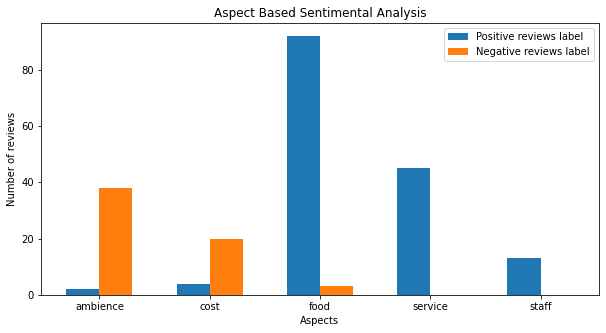

In [38]:
import numpy as np
import matplotlib.pyplot as plt
# Numbers of pairs of bars you want
N = seed_words_count

# Data on X-axis

# Specify the values of blue bars (height)
blue_bar = pos_list
# Specify the values of orange bars (height)
orange_bar = neg_list

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, blue_bar , width, label='Positive reviews label')
plt.bar(ind + width, orange_bar, width, label='Negative reviews label')

plt.xlabel('Aspects')
plt.ylabel('Number of reviews')
plt.title('Aspect Based Sentimental Analysis')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2,new_list)

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()